In [1]:
!pip install yfinance
!pip install bs4
!pip install nbformat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 1.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 18.6 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 84.2 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 93.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 118.0 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 42.9 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.6-py3-none-any.whl size=138891 sha256=9f886f0f430b47

In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [5]:
tesla_data = yf.Ticker('TSLA')

In [6]:
tesla_data = tesla_data.history('max')

In [7]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [8]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'
html_data = requests.get(url).content

In [9]:
soup = BeautifulSoup(html_data,'html.parser')

In [10]:
table = soup.find('table')
table_rows = table.find_all('tr')
data = []
for tr in table_rows:
    td = tr.find_all('td')
    row = [tr.text for tr in td]
    data.append(row)
tesla_revenue = pd.DataFrame(data)
tesla_revenue.columns = ['Date','Revenue']

In [11]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

In [12]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [13]:
tesla_revenue.tail()

,Date,Revenue
9,2013,"$2,013"
10,2012,$413
11,2011,$204
12,2010,$117
13,2009,$112


In [14]:
gme = yf.Ticker('GME')
gme_data = gme.history('max')

In [15]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [16]:
url2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'
html_data_2 = requests.get(url2).text
soup_2 = BeautifulSoup(html_data_2,'html.parser')
table2 = soup_2.find('table')
table_rows2 = table2.find_all('tr')
data2 = []
for tr in table_rows2:
    td = tr.find_all('td')
    row = [tr.text for tr in td]
    data2.append(row)
gme_revenue = pd.DataFrame(data2)
gme_revenue.columns = ['Date','Revenue']
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"")
gme_revenue.tail()

,Date,Revenue
12,2009,"$8,806"
13,2008,"$7,094"
14,2007,"$5,319"
15,2006,"$3,092"
16,2005,"$1,843"


In [19]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.7/163.7 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 58.2 MB/s eta 0:00:0000:01:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.2/323.2 kB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 77.6 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 36.3 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 71.9 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 6.5 MB/s eta 0:00:00


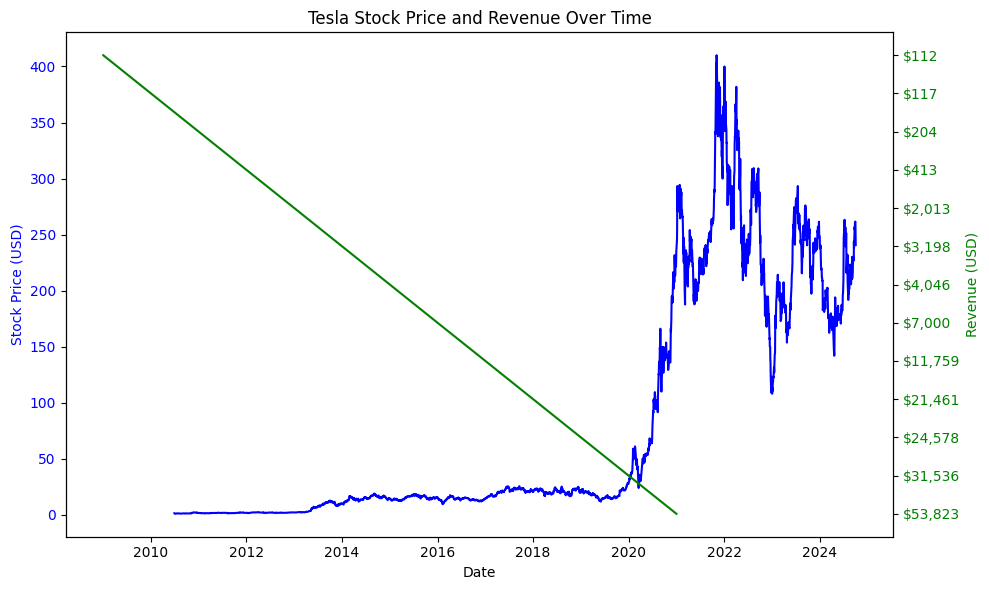

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

tesla_data["Date"] = pd.to_datetime(tesla_data["Date"]).dt.date
tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"]).dt.date

def make_graph(stock_data, revenue_data, company_name):
    fig, ax1 = plt.subplots(figsize=(10,6))

    ax1.plot(stock_data["Date"], stock_data["Close"], color='blue', label='Stock Price')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price (USD)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    ax2 = ax1.twinx()
    ax2.plot(revenue_data["Date"], revenue_data["Revenue"], color='green', label='Revenue')
    ax2.set_ylabel('Revenue (USD)', color='green')
    ax2.tick_params(axis='y', labelcolor='green')
    plt.title(f'{company_name} Stock Price and Revenue Over Time')

    fig.tight_layout()
    plt.show()

make_graph(tesla_data, tesla_revenue, 'Tesla')


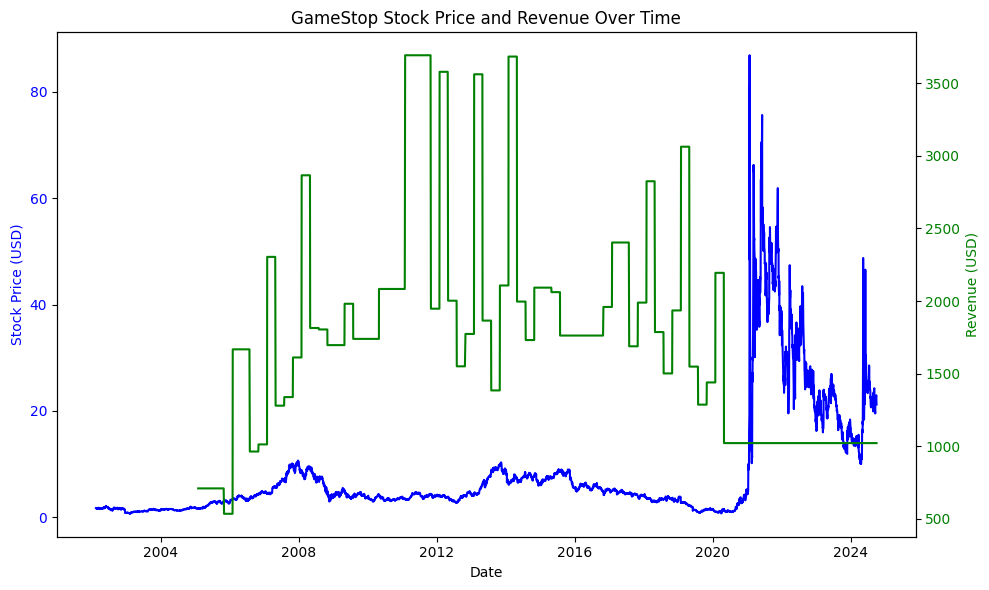

In [34]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# Get GameStop stock data
gamestop = yf.Ticker("GME")
gamestop_data = gamestop.history(period="max")
gamestop_data.reset_index(inplace=True)

# Ensure Date column contains only date information
gamestop_data["Date"] = pd.to_datetime(gamestop_data["Date"]).dt.date

# Web scraping for GameStop revenue data
url_gme = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data_gme = requests.get(url_gme).text
soup_gme = BeautifulSoup(html_data_gme, 'html.parser')

gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Parse the revenue data
for table in soup_gme.find_all('table'):
    if table.find('th').getText().startswith("GameStop Quarterly Revenue"):
        for row in table.find("tbody").find_all("tr"):
            col = row.find_all("td")
            if len(col) != 2: continue
            Date = col[0].text
            Revenue = col[1].text.replace("$", "").replace(",", "")
            new_row = pd.DataFrame({"Date": [Date], "Revenue": [Revenue]})
            gme_revenue = pd.concat([gme_revenue, new_row], ignore_index=True)

# Convert the Date column to datetime and remove timezone info
gme_revenue["Date"] = pd.to_datetime(gme_revenue["Date"]).dt.date

# Merge the stock data and revenue data based on Date
combined_data = pd.merge(gamestop_data, gme_revenue, on="Date", how="left")

# Fill missing revenue values
combined_data["Revenue"] = pd.to_numeric(combined_data["Revenue"], errors='coerce')
combined_data["Revenue"].fillna(method="ffill", inplace=True)

# Function to plot the stock price and revenue
def make_graph(stock_data, company_name):
    fig, ax1 = plt.subplots(figsize=(10,6))

    # Plot the stock price
    ax1.plot(stock_data["Date"], stock_data["Close"], color='blue', label='Stock Price')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price (USD)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # Create second y-axis for revenue
    ax2 = ax1.twinx()
    ax2.plot(stock_data["Date"], stock_data["Revenue"], color='green', label='Revenue')
    ax2.set_ylabel('Revenue (USD)', color='green')
    ax2.tick_params(axis='y', labelcolor='green')

    # Set the title of the graph
    plt.title(f'{company_name} Stock Price and Revenue Over Time')

    # Show the graph
    fig.tight_layout()
    plt.show()

# Call the function to plot the graph for GameStop
make_graph(combined_data, 'GameStop')
